In [241]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from itertools import permutations

In [242]:
# Load data
pd.set_option('display.max_columns', None)
df = pd.read_csv('medical_market_basket.csv')

In [243]:
df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [245]:
df.shape

(15002, 20)

In [246]:
df.describe()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,abilify,abilify,abilify,abilify,losartan,glyburide,losartan,losartan,losartan,losartan,cialis,losartan,losartan,losartan,celebrex,celebrex,levofloxacin,temezepam,boniva,glipizide
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [247]:
# Drop rows with all null values (implies no prescription history) and fill null values with 0
df.dropna(axis=0, how='all', inplace=True)
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 1 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  7501 non-null   object
 2   Presc03  7501 non-null   object
 3   Presc04  7501 non-null   object
 4   Presc05  7501 non-null   object
 5   Presc06  7501 non-null   object
 6   Presc07  7501 non-null   object
 7   Presc08  7501 non-null   object
 8   Presc09  7501 non-null   object
 9   Presc10  7501 non-null   object
 10  Presc11  7501 non-null   object
 11  Presc12  7501 non-null   object
 12  Presc13  7501 non-null   object
 13  Presc14  7501 non-null   object
 14  Presc15  7501 non-null   object
 15  Presc16  7501 non-null   object
 16  Presc17  7501 non-null   object
 17  Presc18  7501 non-null   object
 18  Presc19  7501 non-null   object
 19  Presc20  7501 non-null   object
dtypes: object(20)
memory usage: 1.2+ MB


In [248]:
records = []
for i in range(0,7501):
    records.append([str(df.values[i,j]) for j in range(0,20)])

In [249]:
# Third party code: https://campus.datacamp.com/courses/market-basket-analysis-in-python/introduction-to-market-basket-analysis-1?ex=7


# Define the set of groceries
flattened = [i for t in records for i in t]
prescriptions = list(set(flattened))

# Generate all possible rules
rules = list(permutations(prescriptions, 2))

# Print the set of rules
print(rules)

# Print the number of rules
print(len(rules))

[('ibuprophen', 'pantoprazole'), ('ibuprophen', 'zolpidem'), ('ibuprophen', 'trazodone HCI'), ('ibuprophen', 'ciprofloxacin'), ('ibuprophen', 'topiramate'), ('ibuprophen', 'diclofenac sodium'), ('ibuprophen', 'clonazepam'), ('ibuprophen', 'diazepam'), ('ibuprophen', 'clotrimazole'), ('ibuprophen', 'quetiapine'), ('ibuprophen', 'benicar'), ('ibuprophen', 'fluticasone nasal spray'), ('ibuprophen', 'temezepam'), ('ibuprophen', 'oxycodone'), ('ibuprophen', 'benazepril'), ('ibuprophen', 'lisinopril'), ('ibuprophen', 'atorvastatin'), ('ibuprophen', 'cefdinir'), ('ibuprophen', 'sertraline HCI'), ('ibuprophen', 'celebrex'), ('ibuprophen', 'losartan'), ('ibuprophen', 'levothyroxine sodium'), ('ibuprophen', 'metformin'), ('ibuprophen', 'amphetamine salt combo xr'), ('ibuprophen', 'valsartan'), ('ibuprophen', 'amoxicillin'), ('ibuprophen', 'salmeterol inhaler'), ('ibuprophen', 'lansoprazole'), ('ibuprophen', '0'), ('ibuprophen', 'citalopram'), ('ibuprophen', 'actonel'), ('ibuprophen', 'albuterol 

In [250]:
# Third party code: https://campus.datacamp.com/courses/market-basket-analysis-in-python/introduction-to-market-basket-analysis-1?ex=9

# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(records)

# One-hot encode transactions
onehot = encoder.transform(records)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop(labels='0', axis=1)

# Print the one-hot encoded transaction dataset
onehot

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [251]:
# Compute the support
support = onehot.mean()

# Print the support
support.sort_values(axis=0, ascending=False, inplace=True)
with pd.option_context('display.max_rows', None):
    print(support)

abilify                       0.238368
amphetamine salt combo xr     0.179709
carvedilol                    0.174110
glyburide                     0.170911
diazepam                      0.163845
losartan                      0.132116
atorvastatin                  0.129583
lisinopril                    0.098254
metoprolol                    0.095321
doxycycline hyclate           0.095054
citalopram                    0.087188
dextroamphetamine XR          0.081056
ezetimibe                     0.080389
alprazolam                    0.079323
cialis                        0.076523
amlodipine                    0.071457
amphetamine salt combo        0.068391
glipizide                     0.065858
levofloxacin                  0.063325
paroxetine                    0.062525
clopidogrel                   0.059992
naproxen                      0.058526
furosemide                    0.052393
fenofibrate                   0.051060
metformin                     0.050527
methylprednisone         

In [252]:
# Set support at 0.03
frequent_itemsets = apriori(onehot, 
                            min_support = 0.03,
                            use_colnames = True)

# Print a preview of the frequent itemsets

frequent_itemsets

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.033329,(allopurinol)
3,0.079323,(alprazolam)
4,0.071457,(amlodipine)
5,0.030129,(amphetamine)
6,0.068391,(amphetamine salt combo)
7,0.179709,(amphetamine salt combo xr)
8,0.129583,(atorvastatin)
9,0.174110,(carvedilol)


In [253]:
# Lift at 1.0
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 1.0)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
1,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
3,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
4,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
6,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
7,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
8,(doxycycline hyclate),(abilify),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
9,(abilify),(doxycycline hyclate),0.238368,0.095054,0.033729,0.141499,1.488616,0.011071,1.054100


In [254]:
# Confidence at 0.20
rules = rules[rules['confidence'] > 0.20]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
1,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
3,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
4,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
6,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
7,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
8,(doxycycline hyclate),(abilify),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
10,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401


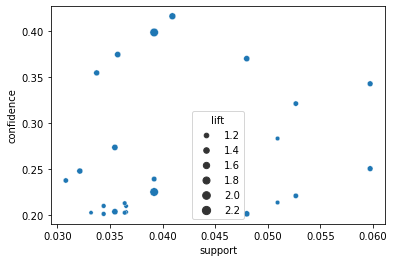

In [255]:
sb.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()